# Test ASKAP Wallaby-MW data cubes 
This is mainly to evaluate rhe MW data cubes and have an overall idea about thier properties

- plot spectra at certain positions
- make moment maps
- test noise in cubes

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation
from astropy.io import fits
from spectral_cube import SpectralCube
from spectral_cube import BooleanArrayMask
from astropy.convolution import Gaussian1DKernel, convolve
import aplpy  
from astropy.wcs import WCS
from reproject import reproject_interp
from astroquery.vizier import Vizier
from astroquery.skyview import SkyView
from astropy.time import Time

Vizier.ROW_LIMIT = -1

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = '16'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
%matplotlib inline

In [2]:
cube = SpectralCube.read('/Users/denes/Research/high_lat_HI/ASKAP_data/data_cubes/NGC4808_combine_MW.fits')  # Open the FITS file for reading

#cube = SpectralCube.read('/Users/denes/Research/high_lat_HI/ASKAP_data/data_cubes/NGC5044_MW.fits')  # Open the FITS file for reading
#cube = SpectralCube.read('/Users/denes/Research/high_lat_HI/ASKAP_data/data_cubes/Hydra_MW.fits')  # Open the FITS file for reading
#cube = SpectralCube.read('/Users/denes/Research/high_lat_HI/ASKAP_data/data_cubes/Norma_MW.fits')  # Open the FITS file for reading
#cube = SpectralCube.read('/Users/denes/Research/high_lat_HI/ASKAP_data/data_cubes/NGC4636_MW.fits')  # Open the FITS file for reading

#cube.moment0(axis=0).quicklook()
 

INFO: Auto-setting vmin to -2.081e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.068e-01 [aplpy.core]


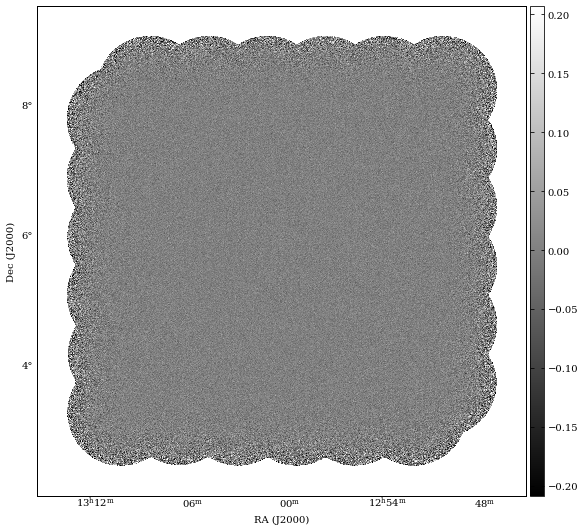

In [3]:
cube_2 = cube.with_spectral_unit(u.km/u.s, velocity_convention='optical', rest_value=1.420405752 * u.GHz) 
subcube = cube_2.spectral_slab(40*u.km/u.s,60*u.km/u.s)

subcube.moment0(axis=0).quicklook()

In [4]:
cube.shape

(432, 4512, 4515)

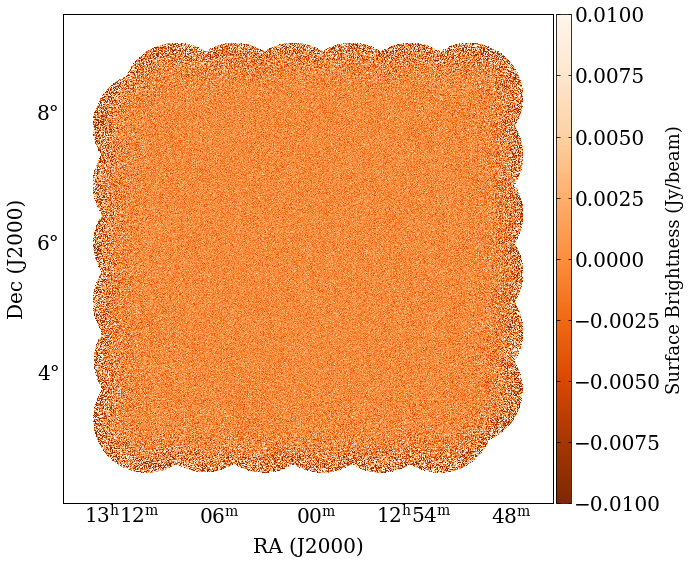

In [41]:
def plot_channel_map(ch):
    f = aplpy.FITSFigure(cube[ch,:,:].hdu)  
    f.show_colorscale(cmap='Oranges_r', vmin=-0.01, vmax=0.01)  
    #f.recenter(153.94, -27.374, radius=4.)

    f.add_colorbar()
    f.colorbar.set_axis_label_text('Surface Brightness (Jy/beam)')
    f.colorbar.set_axis_label_font(size=18)
    f.colorbar.set_font(size=20, weight='medium', family='serif')

    f.axis_labels.set_font(size=20, weight='medium', family='serif')
    f.tick_labels.set_font(size=20, weight='medium', family='serif')
    #f.recenter(154.403343-(154.403343-150.377726)/2, -30.446054+(30.446054-27.849166)/2, width=2., height=1.2)
    f.save('NGC5044_moment_ch{}.png'.format(ch), dpi=200) 

plot_channel_map(10)

# Make moment map

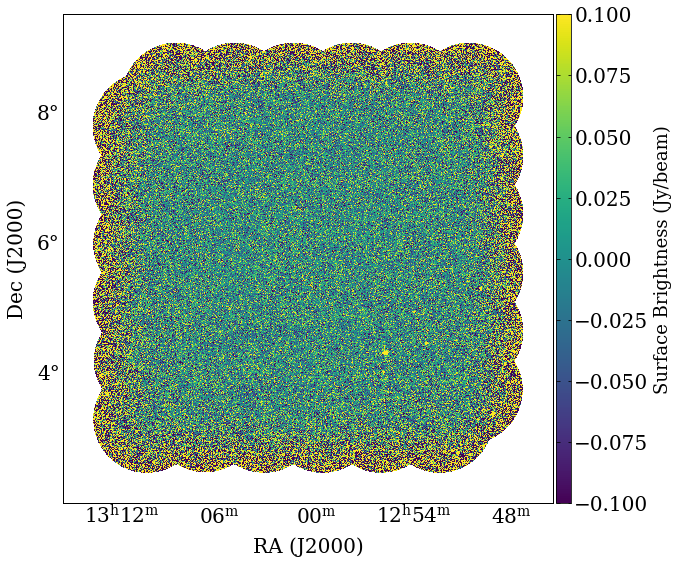

In [48]:
def make_moment_map(vel):
    cube_3 = cube.with_spectral_unit(u.km/u.s, velocity_convention='optical', rest_value=1.420405752 * u.GHz) 
    subcube = cube_3.spectral_slab(vel[0]*u.km/u.s,vel[1]*u.km/u.s)
    moment_0_v3 = subcube.moment(order=0)

    f = aplpy.FITSFigure(moment_0_v3.hdu)  
    f.show_colorscale(cmap='viridis', vmin=-0.1, vmax=0.1)  
    #f.recenter(153.94, -27.374, radius=4.)
    
    f.add_colorbar()
    f.colorbar.set_axis_label_text('Surface Brightness (Jy/beam)')
    f.colorbar.set_axis_label_font(size=18)
    f.colorbar.set_font(size=20, weight='medium', family='serif')
    
    f.axis_labels.set_font(size=20, weight='medium', family='serif')
    f.tick_labels.set_font(size=20, weight='medium', family='serif')
    #f.recenter(154.403343-(154.403343-150.377726)/2, -30.446054+(30.446054-27.849166)/2, width=2., height=1.2)
    f.save('NGC5044_moment_{}-{}.png'.format(vel[0],vel[1]), dpi=200) 

    hdul = fits.HDUList([moment_0_v3.hdu])
    hdul[0].header['BMIN']=0.5
    hdul[0].header['BMAJ']=0.5
    hdul[0].header['BPA']=0
    hdul.writeto('NGC4808_cube_mom_0_{}-{}kms.fits'.format(vel[0],vel[1]), overwrite=True)

#make_moment_map([-20,-10])
#make_moment_map([-30,10])
#make_moment_map([-30,-25])
#make_moment_map([-25,-20])
#make_moment_map([-20,-15])
#make_moment_map([-15,-10])
#make_moment_map([-10,-5])
#make_moment_map([-5,0])
#make_moment_map([0,5])
#make_moment_map([5,10])
#make_moment_map([0,10])
#make_moment_map([10,20])
#make_moment_map([20,30])
#make_moment_map([30,40])
#make_moment_map([40,50])


make_moment_map([700,1000])

/opt/anaconda3/lib/python3.8/site-packages/spectral_cube/_moments.py:87: RuntimeWarning: invalid value encountered in true_divide
  return result / weights


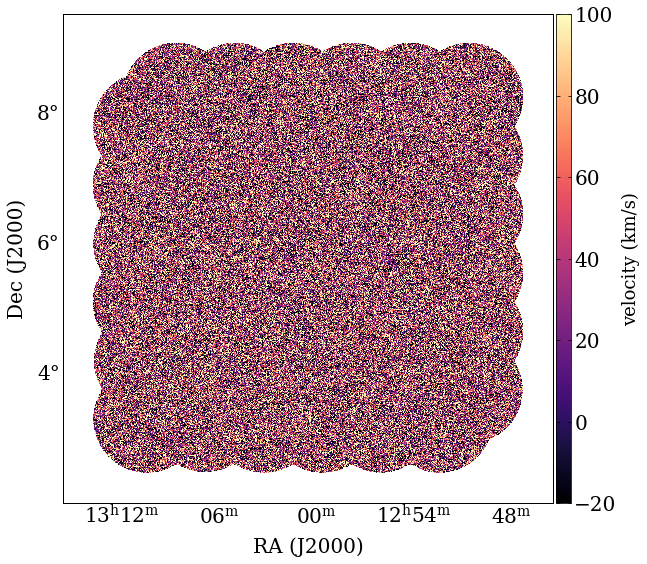

In [12]:
def make_moment1_map(vel):
    cube_3 = cube.with_spectral_unit(u.km/u.s, velocity_convention='optical', rest_value=1.420405752 * u.GHz) 
    subcube = cube_3.spectral_slab(vel[0]*u.km/u.s,vel[1]*u.km/u.s)
    moment_1_v3 = subcube.moment(order=1)

    f = aplpy.FITSFigure(moment_1_v3.hdu)  
    f.show_colorscale(cmap='magma', vmin=vel[0], vmax=vel[1])  
    #f.recenter(153.94, -27.374, radius=4.)
    
    f.add_colorbar()
    f.colorbar.set_axis_label_text('velocity (km/s)')
    f.colorbar.set_axis_label_font(size=18)
    f.colorbar.set_font(size=20, weight='medium', family='serif')
    
    f.axis_labels.set_font(size=20, weight='medium', family='serif')
    f.tick_labels.set_font(size=20, weight='medium', family='serif')
    #f.recenter(154.403343-(154.403343-150.377726)/2, -30.446054+(30.446054-27.849166)/2, width=2., height=1.2)
    f.save('NGC4808_moment_1_{}-{}.png'.format(vel[0],vel[1]), dpi=200) 
    
make_moment1_map([-20,100])

In [13]:
hdul = fits.HDUList([moment_0_v3.hdu])
hdul.writeto('NGC4808_mom_0_v2_masked.fits')

NameError: name 'moment_0_v3' is not defined

# Make nice overlay image

In [ ]:
#centre = '10:17:49, -27:49:27'
#coordinate = centre.replace(',', '')
Vizier.ROW_LIMIT = -1

#hi_data = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/large_cube_mom_0_-10-10kms.fits')  # Open the FITS file for reading
hi_data = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/large_cube_mom_0_140-160kms.fits')  # Open the FITS file for reading

d = hi_data[0].data
h = hi_data[0].header

coordinate = '{}{}'.format(h['CRVAL1'], h['CRVAL2']) # this is the centre of the right hand part of the footprint and not the full centre
c = SkyCoord(coordinate, unit=(u.deg, u.deg))
print(c.ra.hms)

co_data = fits.open('/Users/denes/Research/high_lat_HI/Planck_CO/Rep_Lon264.69deg-Lat23.29deg_15deg_COM_CompMap_CO21-commander_2048_R2.00_v2.fits')  # Open the FITS file for reading
print(co_data[1].shape)
d2 = co_data[1].data
h2 = co_data[1].header

co_reprojected, footprint = reproject_interp(co_data[1], h)

print(d2.shape)

result = Vizier(column_filters={"S1.4":">150"}, row_limit=-1).query_constraints(catalog='VIII/65/nvss',RAJ2000='>{} & <{}'.format(c.ra.deg-3.6, c.ra.deg+9.4), DEJ2000='>{} & <{}'.format(c.dec.deg-3, c.dec.deg+3), MajAxis='<45')
print('number of sources:',len(result[0]))
#print(result[0]['NVSS', 'S1.4'] )
sources = ['10:28:09.68 -26:44:18.9', '10:19:08.52 -27:08:56.5', '10:22:29.45 -26:47:34.3']


fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection=WCS(h))

# Display the moment map image
im = ax.imshow(d, cmap='viridis_r', vmin=0, vmax=0.1)
ax.contour(co_reprojected, levels=[0.4, 0.8], cmap='Blues_r', alpha=0.7)

x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

for i in range(0, len(result[0])):
    c = SkyCoord(result[0]['RAJ2000'][i], result[0]['DEJ2000'][i], unit=(u.hourangle, u.deg))
    ax.scatter(c.ra, c.dec, transform=ax.get_transform('fk5'), marker='o', s=float(result[0]['S1.4'][i])*0.83, linewidth=2, edgecolor='k', facecolor='none')

for j in range(0, len(sources)):
    c3 = SkyCoord(sources[j], unit=(u.hourangle, u.deg))
    ax.scatter(c3.ra, c3.dec, transform=ax.get_transform('fk5'), marker='<', s=100, edgecolor='k', linewidth=2, facecolor='none')
    #ax.text(c3.ra.value, c3.dec.value, transform=ax.get_transform('fk5'),s=sources[j],fontsize=10)


#ax.set_title('Hydra', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.coords['ra'].set_axislabel('RA (J2000)', fontsize=22)
ax.coords['dec'].set_axislabel('Dec (J2000)', fontsize=22)
cbar_hi = plt.colorbar(im, orientation='vertical', fraction=0.022, pad=0.12)
#cbar_hi.set_label('NHI', size=18)

overlay = ax.get_coords_overlay('galactic')
overlay.grid(color='k', ls='dotted')
overlay[0].set_axislabel('Galactic Longitude',fontsize=22)
overlay[1].set_axislabel('Galactic Latitude',fontsize=22)

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

#plt.colorbar(im)
fig.savefig('Hydra_CO_ASKAP_overlay_v2.png',dpi=200)

In [ ]:
hi_data = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/Karens_tests/image.restored.i.SB10269.cube.fits')  # Open the FITS file for reading
d = hi_data[0].data
h = hi_data[0].header
w = WCS(h, hi_data)

centre = '10:09:10, -28:55:47'
coordinate = centre.replace(',', '')
c = SkyCoord(coordinate, unit=(u.hourangle, u.deg))

pixels = c.to_pixel(w) 
# 'J100910-285547' [3277, 1466]
print(int(pixels[0]), int(pixels[1]))
c = SkyCoord(result[0]['RAJ2000'][i], result[0]['DEJ2000'][i], unit=(u.hourangle, u.deg))

## Extract spectra from cube at certain coordinates
- use bright continuum sources from NVSS to search for HI absorption

In [ ]:
def plot_spectra(pixels, name):
    cube = SpectralCube.read('/Users/denes/Research/high_lat_HI/ASKAP_data/Karens_tests/image.restored.i.SB10269.cube.contsub.fits')  # Open the FITS file for reading
    #cube.moment0(axis=0).quicklook()

    spectrum = cube[:, pixels[1], pixels[0]]  # 10:09:10 -28:55:57

    restfreq = 1.420405752 * u.GHz  # rest frequency of HI
    freq_to_vel = u.doppler_optical(restfreq) # using the radio convention
    vel = (cube.spectral_axis).to(u.km / u.s, equivalencies=freq_to_vel)

    tau = np.log(spectrum.value +1) * -1.

    fig = plt.figure(figsize=(16, 12))
    ax1 = fig.add_subplot(111)
    plt.title('{} ASKAP data'.format(name.replace(' ', '')), fontsize=30)
    plt.plot(vel, spectrum.value+1, linewidth=3)

    plt.ylabel(r'e$^{-\tau}$', fontsize=28)
    plt.xlabel("v [km/s]", fontsize=28)
    #plt.xlim(-100,100)
    plt.axhline(1, color='k', linestyle='--')
    ax1.tick_params(axis='both', which='major', labelsize=25)
    fig.savefig('spectra_{}_v2.png'.format(name.replace(' ', '')))
    
plot_spectra([3277, 1466], 'J100910-285547')


In [ ]:
centre = '10:17:49, -27:49:27'
coordinate = centre.replace(',', '')
c0 = SkyCoord(coordinate, unit=(u.hourangle, u.deg))
result = Vizier(column_filters={"S1.4":">300"}).query_constraints(catalog='VIII/65/nvss',RAJ2000='>{} & <{}'.format(c0.ra.deg-3, c0.ra.deg+3), DEJ2000='>{} & <{}'.format(c0.dec.deg-3, c0.dec.deg+3), MajAxis='<45')

for i in range(0, len(result[0])): 
    c = SkyCoord(result[0]['RAJ2000'][i], result[0]['DEJ2000'][i], unit=(u.hourangle, u.deg))
    pixels = c.to_pixel(w)
    plot_spectra([int(pixels[0]), int(pixels[1])], '{}{}'.format(result[0]['RAJ2000'][i], result[0]['DEJ2000'][i]))

In [ ]:
cube_atca = SpectralCube.read('/Users/denes/Research/high_lat_HI/ATCA_data/hydra/j102809-2644_cube_4k.fits')  # Open the FITS file for reading
cube_askap = SpectralCube.read('/Users/denes/Research/high_lat_HI/ASKAP_data/Karens_tests/image.restored.i.SB10269.cube.contsub.fits')  # Open the FITS file for reading

askap = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/Karens_tests/image.restored.i.SB10269.cube.contsub.fits')  # Open the FITS file for reading
d_askap = askap[0].data
h_askap = askap[0].header
w_askap = WCS(h_askap, askap)

#print(h_askap)

MRO = EarthLocation.of_site('mro') 
#keck = EarthLocation.from_geodetic(lat=19.8283*u.deg, lon=-155.4783*u.deg, height=4160*u.m)
barycorr = c.radial_velocity_correction(obstime=Time('2019-10-25'), location=MRO)  
#barycorr = barycorr.to(u.km/u.s)

atca = fits.open('/Users/denes/Research/high_lat_HI/ATCA_data/hydra/j102809-2644_cube_4k.fits')  # Open the FITS file for reading
d_atca = atca[0].data
h_atca = atca[0].header
w_atca = WCS(h_atca, atca)

restfreq = 1.420405752 * u.GHz  # rest frequency of HI
freq_to_vel = u.doppler_optical(restfreq) # using the radio convention
vel_askap = (cube_askap.spectral_axis).to(u.km / u.s, equivalencies=freq_to_vel) - barycorr/2

coord = '10:28:09.68 -26:44:18.9'
c = SkyCoord(coord, unit=(u.hourangle, u.deg))
pixels_askap = c.to_pixel(w_askap)
pixels_atca = c.to_pixel(w_atca)

print(pixels_askap)

# ASKAP spectrum
spectrum_askap = cube_askap[:, int(pixels_askap[1]), int(pixels_askap[0])]  # 10:09:10 -28:55:57
tau_askap = np.log(spectrum_askap.value +1) * -1.

# ATCA spectrum
spectrum_atca = cube_atca[:, int(pixels_atca[1]), int(pixels_atca[0])]  
vel_atca = cube_atca.spectral_axis
y1 = spectrum_atca[:300]
x1 = vel_atca[-300:].value/1000
y2 = spectrum_atca[:300]
x2 = vel_atca[-300:].value/1000
x = np.concatenate((x1,x2), axis=None)
y = np.concatenate((y1,y2), axis=None)
pars = np.polyfit(vel_atca.value, spectrum_atca.value, 1)
p = np.poly1d(pars)

g = Gaussian1DKernel(4.0)
hismooth = convolve(spectrum_atca, g, boundary='extend')
tauhi_smooth = hismooth/p(vel_atca.value/1000)
tauhi = spectrum_atca/p(vel_atca.value/1000)
tauhi = np.array(tauhi)
tau_atca = np.log(tauhi) * -1.

#tauhi = hismooth/p(hiv)
minustauhi = 1. - tauhi
minustauhi_smooth = 1. - tauhi_smooth

# plot
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(111)
plt.plot(vel_atca/1000, tauhi, 'C0', linewidth=3,  label='ATCA')
#plt.plot(vel_atca/1000, tauhi_smooth, 'C0', linewidth=3, label='ATCA')

plt.plot(vel_askap, spectrum_askap.value+1, 'C1', linewidth=3, label='ASKAP')
plt.title('102809-264418', fontsize=30)
plt.ylabel(r'e$^{-\tau}$', fontsize=28)
plt.xlabel("v [km/s]", fontsize=28)
plt.xlim(-100,100)
plt.axhline(1, color='k', linestyle='--')
plt.legend(fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=25)
fig.savefig('spectra_102809-264418_ASKAP_ATCA.png')
    
    
    

In [ ]:
# EarthLocation.get_site_names()

# Plot spectra

In [ ]:
# maka a comparison plot showing the smoothed ATCA data and the ASKAP data

atca_file = 'j102809-2644'
coord = '10:28:09.68 -26:44:18.9'


def compare_ASKAP_ATCA(atca_file, coord):
    cube_askap = SpectralCube.read('/Users/denes/Research/high_lat_HI/ASKAP_data/Karens_test_v2/Hydra_MW.fits')  # Open the FITS file for reading
    cube_atca = SpectralCube.read('/Users/denes/Research/high_lat_HI/ATCA_data/hydra/{}_cube_4k.fits'.format(atca_file))  # Open the FITS file for reading
    #cube_askap = SpectralCube.read('/Users/denes/Research/high_lat_HI/ASKAP_data/Karens_tests/image.restored.i.SB10269.cube.contsub.fits')  # Open the FITS file for reading

    askap = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/Karens_test_v2/Hydra_MW.fits')  # Open the FITS file for reading
    d_askap = askap[0].data
    h_askap = askap[0].header
    w_askap = WCS(h_askap, askap)

    #print(h_askap)

    #coord = '10:28:09.68 -26:44:18.9'
    c = SkyCoord(coord, unit=(u.hourangle, u.deg))
    print(c.ra.hms, c.dec.dms)


    MRO = EarthLocation.of_site('mro') 
    #keck = EarthLocation.from_geodetic(lat=19.8283*u.deg, lon=-155.4783*u.deg, height=4160*u.m)
    barycorr = c.radial_velocity_correction(obstime=Time('2019-10-25'), location=MRO)  
    #barycorr = barycorr.to(u.km/u.s)

    atca = fits.open('/Users/denes/Research/high_lat_HI/ATCA_data/hydra/{}_cube_4k.fits'.format(atca_file))  # Open the FITS file for reading
    d_atca = atca[0].data
    h_atca = atca[0].header
    w_atca = WCS(h_atca, atca)

    restfreq = 1.420405752 * u.GHz  # rest frequency of HI
    freq_to_vel = u.doppler_optical(restfreq) # using the radio convention
    vel_askap = (cube_askap.spectral_axis).to(u.km / u.s, equivalencies=freq_to_vel) - barycorr/2

    pixels_askap = c.to_pixel(w_askap)
    pixels_atca = c.to_pixel(w_atca)

    print(pixels_askap)

    # ASKAP spectrum
    spectrum_askap = cube_askap[:, int(pixels_askap[1]), int(pixels_askap[0])]  # 10:09:10 -28:55:57
    spectrum_askap_v2 = d_askap[:, 0, int(pixels_askap[1])-2:int(pixels_askap[1])+3, int(pixels_askap[0])-2:int(pixels_askap[0])+3]
    spectrum_askap_v2 = np.sum(spectrum_askap_v2, axis=1)
    spectrum_askap_v2 = np.sum(spectrum_askap_v2, axis=1)/25 
    tau_askap = np.log(spectrum_askap.value +1) * -1.
    rms_askap = np.sqrt(np.mean(spectrum_askap.value**2))

    # ATCA spectrum
    spectrum_atca = cube_atca[:, int(pixels_atca[1]), int(pixels_atca[0])]  
    vel_atca = cube_atca.spectral_axis
    y1 = spectrum_atca[:300]
    x1 = vel_atca[-300:].value/1000
    y2 = spectrum_atca[:300]
    x2 = vel_atca[-300:].value/1000
    x = np.concatenate((x1,x2), axis=None)
    y = np.concatenate((y1,y2), axis=None)
    pars = np.polyfit(vel_atca.value, spectrum_atca.value, 1)
    p = np.poly1d(pars)

    g = Gaussian1DKernel(4.0)
    hismooth = convolve(spectrum_atca, g, boundary='extend')
    tauhi_smooth = hismooth/p(vel_atca.value/1000)
    tauhi = spectrum_atca/p(vel_atca.value/1000)
    tauhi = np.array(tauhi)
    tau_atca = np.log(tauhi) * -1.

    #tauhi = hismooth/p(hiv)
    minustauhi = 1. - tauhi
    minustauhi_smooth = 1. - tauhi_smooth
    rms_atca = np.sqrt(np.mean(tauhi**2))
    
    print('rms askap, atca:', rms_askap, rms_atca)

    # plot
    fig = plt.figure(figsize=(16, 12))
    ax1 = fig.add_subplot(111)
    plt.plot(vel_atca/1000, tauhi, 'C0', linewidth=3,  label='ATCA')
    plt.plot(vel_askap, spectrum_askap.value+1, 'C1', linewidth=3, label='ASKAP')
    plt.plot(vel_askap, spectrum_askap_v2+1, 'C3', linewidth=3, label='ASKAP av')
    plt.title('{}'.format(atca_file), fontsize=30)
    plt.ylabel(r'e$^{-\tau}$', fontsize=28)
    plt.xlabel("v [km/s]", fontsize=28)
    plt.xlim(-100,180)
    plt.axhline(1, color='k', linestyle='--')
    plt.legend(fontsize=20)
    ax1.tick_params(axis='both', which='major', labelsize=25)
    fig.savefig('spectra_{}_ASKAP_ATCA_v3.png'.format(atca_file))
    

In [ ]:

atca_files = ['j102809-2644', 'j101908-2708', 'j102229-2647']
coord = ['10:28:09.68 -26:44:18.9', '10:19:08.52 -27:08:56.5', '10:22:29.45 -26:47:34.3']

for i in range(len(atca_files)):
    compare_ASKAP_ATCA(atca_files[i], coord[i])

In [ ]:
cube_askap = SpectralCube.read('/Users/denes/Research/high_lat_HI/ASKAP_data/Karens_test_v2/Hydra_MW.fits')  # Open the FITS file for reading
askap = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/Karens_test_v2/Hydra_MW.fits')  # Open the FITS file for reading
d_askap = askap[0].data
h_askap = askap[0].header
w_askap = WCS(h_askap, askap)


coordinate = '{}{}'.format(h_askap['CRVAL1'], h_askap['CRVAL2'])
c = SkyCoord(coordinate, unit=(u.deg, u.deg))
print(c)

result = Vizier(column_filters={"S1.4":">150"}, row_limit=-1).query_constraints(catalog='VIII/65/nvss',RAJ2000='>{} & <{}'.format(c.ra.deg-3.6, c.ra.deg+9.4), DEJ2000='>{} & <{}'.format(c.dec.deg-3, c.dec.deg+3))
print('number of sources:',len(result[0]))
#print(result[0]['RAJ2000'][0],result[0]['DEJ2000'][0])

for i in range(len(result[0])):
    coord = '{} {}'.format(result[0]['RAJ2000'][i].replace(' ',':'),result[0]['DEJ2000'][i].replace(' ',':'))
    c2 = SkyCoord(coord, unit=(u.hourangle, u.deg))
    pixels_askap = c2.to_pixel(w_askap)
    #print(coord )
    #print(pixels_askap)

    spectrum_askap = cube_askap[:, int(pixels_askap[1]), int(pixels_askap[0])]  # 10:09:10 -28:55:57
    tau_askap = np.log(spectrum_askap.value +1) * -1.
    rms = np.sqrt(np.mean(spectrum_askap.value**2))

    # plot
    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111)
    ax.set_title('{}{}'.format(result[0]['RAJ2000'][i].replace(' ',':'),result[0]['DEJ2000'][i].replace(' ',':')), fontsize=20)

    plt.plot(vel_askap, spectrum_askap.value+1, 'C1', linewidth=3, label='ASKAP')
    ax.axhspan(1-rms, 1+rms, alpha=0.5, color='lightgrey')
    #plt.title('102809-264418', fontsize=30)
    plt.ylabel(r'e$^{-\tau}$', fontsize=28)
    plt.xlabel("v [km/s]", fontsize=28)
    plt.xlim(-200,200)
    #plt.ylim(0.92,1.02)
    plt.axhline(1, color='k', linestyle='--')
    plt.legend(fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=25)
    fig.savefig('./spectra_plots/{}{}_ASKAP_spectra.png'.format(result[0]['RAJ2000'][i].replace(' ',''),result[0]['DEJ2000'][i].replace(' ','')))
    
    

In [ ]:
cube_askap = SpectralCube.read('/Users/denes/Research/high_lat_HI/ASKAP_data/Karens_test_v2/Hydra_MW.fits')  # Open the FITS file for reading
askap = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/Karens_test_v2/Hydra_MW.fits')  # Open the FITS file for reading
d_askap = askap[0].data
h_askap = askap[0].header
w_askap = WCS(h_askap, askap)
print(h_askap['CRVAL1'], h_askap['CRVAL2'])


centre = '10:17:49, -27:49:27'
coordinate = centre.replace(',', '')
#c = SkyCoord(coordinate, unit=(u.hourangle, u.deg))
#print(c)

coordinate = '{}{}'.format(h_askap['CRVAL1'], h_askap['CRVAL2'])
c = SkyCoord(coordinate, unit=(u.deg, u.deg))
print(c)

result = Vizier(column_filters={"S1.4":">150"}, row_limit=-1).query_constraints(catalog='VIII/65/nvss',RAJ2000='>{} & <{}'.format(c.ra.deg-3.6, c.ra.deg+9.4), DEJ2000='>{} & <{}'.format(c.dec.deg-3, c.dec.deg+3), MajAxis='<45')
print('number of sources:',len(result[0]))
#print(result[0]['RAJ2000'][0],result[0]['DEJ2000'][0])


# plot
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(111)

for i in range(len(result[0])):
    coord = '{} {}'.format(result[0]['RAJ2000'][i].replace(' ',':'),result[0]['DEJ2000'][i].replace(' ',':'))
    c2 = SkyCoord(coord, unit=(u.hourangle, u.deg))
    pixels_askap = c2.to_pixel(w_askap)
    #print(coord )
    #print(pixels_askap)

    spectrum_askap = cube_askap[:, int(pixels_askap[1]), int(pixels_askap[0])]  # 10:09:10 -28:55:57
    tau_askap = np.log(spectrum_askap.value +1) * -1.

    plt.plot(vel_askap, spectrum_askap.value+1, 'lightgrey', linewidth=3, label='ASKAP')
#plt.title('102809-264418', fontsize=30)
plt.ylabel(r'e$^{-\tau}$', fontsize=28)
plt.xlabel("v [km/s]", fontsize=28)
plt.xlim(-300,600)
#plt.ylim(0.92,1.02)
plt.axhline(1, color='k', linestyle='--')
ax1.tick_params(axis='both', which='major', labelsize=25)
fig.savefig('./spectra_plots/ASKAP_spectra_all.png'.format(result[0]['RAJ2000'][i].replace(' ',''),result[0]['DEJ2000'][i].replace(' ','')))

    

In [ ]:
cube_askap = SpectralCube.read('/Users/denes/Research/high_lat_HI/ASKAP_data/Karens_test_v2/Hydra_MW.fits')  # Open the FITS file for reading
askap = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/Karens_test_v2/Hydra_MW.fits')  # Open the FITS file for reading
d_askap = askap[0].data
h_askap = askap[0].header
w_askap = WCS(h_askap, askap)
print(h_askap['CRVAL1'], h_askap['CRVAL2'])


centre = '10:17:49, -27:49:27'
coordinate = centre.replace(',', '')
#c = SkyCoord(coordinate, unit=(u.hourangle, u.deg))
#print(c)

coordinate = '{}{}'.format(h_askap['CRVAL1'], h_askap['CRVAL2'])
c = SkyCoord(coordinate, unit=(u.deg, u.deg))
print(c)

result = Vizier(column_filters={"S1.4":">200"}, row_limit=-1).query_constraints(catalog='VIII/65/nvss',RAJ2000='>{} & <{}'.format(c.ra.deg-3.6, c.ra.deg+9.4), DEJ2000='>{} & <{}'.format(c.dec.deg-3, c.dec.deg+3), MajAxis='<45')
print('number of sources:',len(result[0]))
#print(result[0]['RAJ2000'][0],result[0]['DEJ2000'][0])


# plot
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(111)

for i in range(len(result[0])):
    coord = '{} {}'.format(result[0]['RAJ2000'][i].replace(' ',':'),result[0]['DEJ2000'][i].replace(' ',':'))
    c2 = SkyCoord(coord, unit=(u.hourangle, u.deg))
    pixels_askap = c2.to_pixel(w_askap)
    #print(coord )
    #print(pixels_askap)

    spectrum_askap = cube_askap[:, int(pixels_askap[1]), int(pixels_askap[0])]  # 10:09:10 -28:55:57
    tau_askap = np.log(spectrum_askap.value +1) * -1.

    plt.plot(vel_askap, tau_askap, 'lightgrey', linewidth=3, label='ASKAP')
#plt.title('102809-264418', fontsize=30)
plt.ylabel(r'$\tau$', fontsize=28)
plt.xlabel("v [km/s]", fontsize=28)
plt.xlim(-100,100)
#plt.ylim(0.92,1.02)
plt.axhline(0, color='k', linestyle='--')
ax1.tick_params(axis='both', which='major', labelsize=25)
fig.savefig('./spectra_plots/ASKAP_tau_all.png'.format(result[0]['RAJ2000'][i].replace(' ',''),result[0]['DEJ2000'][i].replace(' ','')))

    

# RMS in the cube

In [9]:
# calculate per channel properties of the cube
# this section could probably be optimized 

#name = 'Hydra'
#name = 'Norma'
#name = 'NGC4636'
#name = 'NGC5044'
name = 'NGC4808'
#askap = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/data_cubes/{}_MW.fits'.format(name))  # Open the FITS file for reading
#cube = SpectralCube.read('/Users/denes/Research/high_lat_HI/ASKAP_data/data_cubes/{}_MW.fits'.format(name))  # Open the FITS file for reading

askap = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/data_cubes/{}_combine_MW.fits'.format(name))  # Open the FITS file for reading
cube = SpectralCube.read('/Users/denes/Research/high_lat_HI/ASKAP_data/data_cubes/{}_combine_MW.fits'.format(name))  # Open the FITS file for reading

d_askap = askap[0].data
h_askap = askap[0].header
w_askap = WCS(h_askap, askap)

rms = []
min_a = []
max_a = []

#for i in range(270):
for i in range(432):
    rms.append(np.sqrt(np.nanmean(np.square(d_askap[i, 0, :, :]))))
    min_a.append(np.nanmin(d_askap[i, 0, :, :]))
    max_a.append(np.nanmax(d_askap[i, 0, :, :]))

#print('RMS:',rms) 

restfreq = 1.420405752 * u.GHz  # rest frequency of HI
freq_to_vel = u.doppler_optical(restfreq) # using the radio convention
vel_askap = (cube.spectral_axis).to(u.km / u.s, equivalencies=freq_to_vel) 

In [10]:
print(d_askap.shape)

(432, 1, 4512, 4515)


432
0.0037145128
-0.05115038 0.05123354


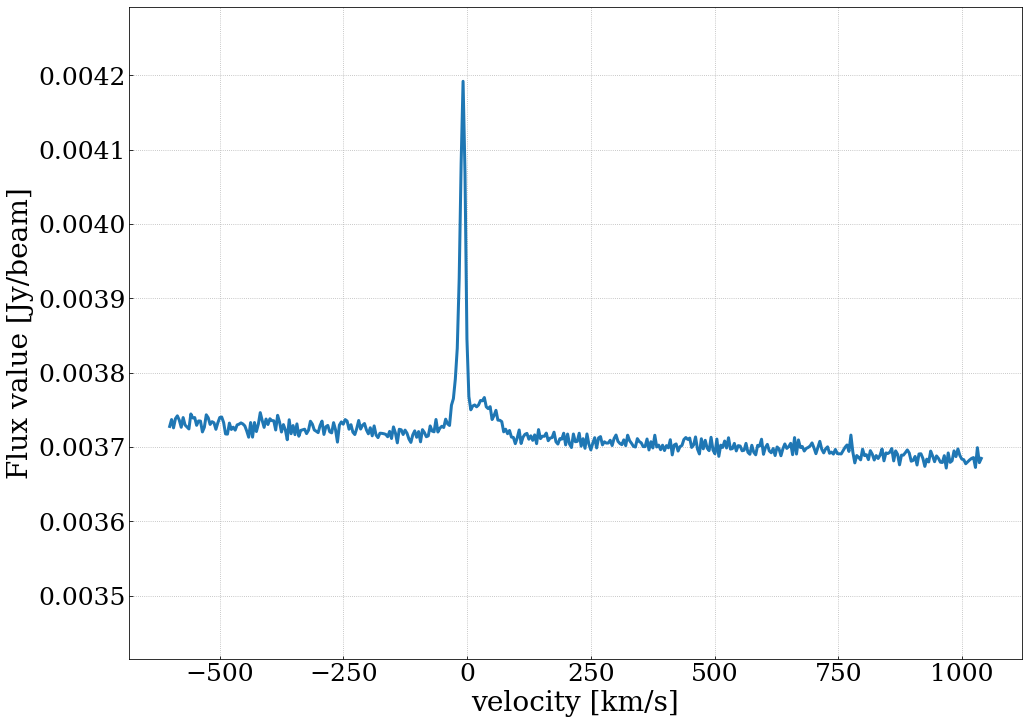

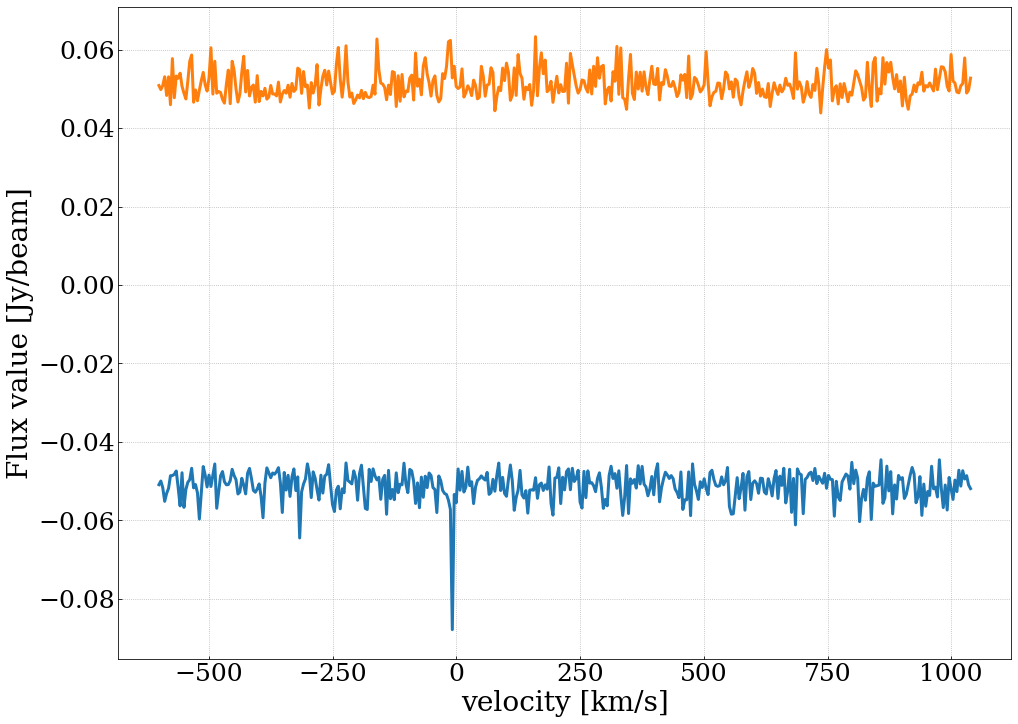

In [38]:
# make plots of the cube properties

print(len(rms))

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(111)
#plt.title(name, fontsize=25)
#plt.plot(vel_askap[:-35],rms[:-35], lw=3)
plt.plot(vel_askap[:-12],rms[:-12], lw=3)
plt.grid(linestyle=':')
plt.ylabel('Flux value [Jy/beam]', fontsize=28)
plt.xlabel("velocity [km/s]", fontsize=28)
#plt.xlim(0,235)
rms_av = np.average(rms[:-35])
print(rms_av)
rms_max = np.max(rms)
plt.ylim(rms_av-0.0003, rms_max+0.0001)
ax1.tick_params(axis='both', which='major', labelsize=25)
fig.savefig('{}_rms.png'.format(name))

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(111)
#plt.title(name, fontsize=25)
#plt.plot(vel_askap[:-35],min_a[:-35], lw=3)
#plt.plot(vel_askap[:-35],max_a[:-35], lw=3)
plt.plot(vel_askap[:-12],min_a[:-12], lw=3)
plt.plot(vel_askap[:-12],max_a[:-12], lw=3)
plt.grid(linestyle=':')
plt.ylabel('Flux value [Jy/beam]', fontsize=28)
plt.xlabel("velocity [km/s]", fontsize=28)
#plt.xlim(0,235)
min_av = np.average(min_a[:-35])
max_av = np.average(max_a[:-35])
print(min_av, max_av)
rms_max = np.max(rms)
#plt.ylim(rms_av-0.0001, rms_max+0.0001)
ax1.tick_params(axis='both', which='major', labelsize=25)
fig.savefig('{}_min_max.png'.format(name))

## Peak intensity map

In [30]:
#askap = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/data_cubes/Hydra_MW.fits')  # Open the FITS file for reading
#askap = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/data_cubes/Norma_MW.fits')  # Open the FITS file for reading
#askap = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/data_cubes/NGC4636_MW.fits')
#askap = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/data_cubes/NGC5044_MW.fits')
askap = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/data_cubes/NGC4808_combine_MW.fits')

d_askap = askap[0].data
h_askap = askap[0].header
w_askap = WCS(h_askap, askap)

#peak = np.max(d_askap, axis=0)
peak = np.max(d_askap[0:420,:,:,:], axis=0)  # some beams are missing channels for NGC4808


In [31]:
d_askap[0:420,:,:,:].shape

(420, 1, 4512, 4515)

0.063304566


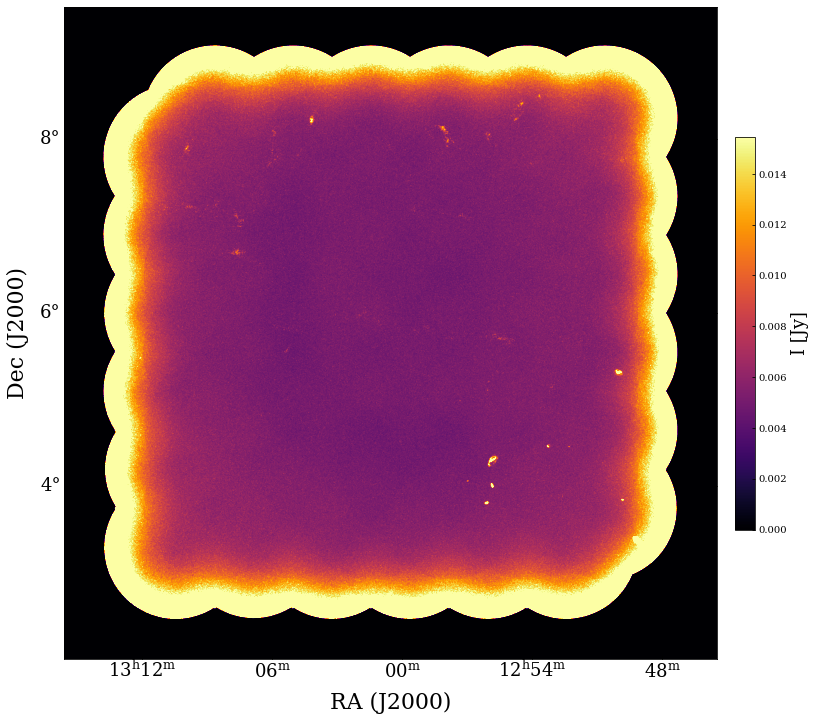

In [32]:
#hi_data = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/Norma_cube_mom_0_400-500kms.fits')  # Open the FITS file for reading
#hi_data = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/large_cube_mom_0_140-160kms.fits')  # Open the FITS file for reading
#hi_data = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/NGC4636_cube_mom_0_-10-10kms.fits')  # Open the FITS file for reading
#hi_data = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/NGC5044_cube_mom_0_-10-10kms.fits')  # Open the FITS file for reading
hi_data = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/NGC4808_cube_mom_0_0-10kms.fits')  # Open the FITS file for reading

d = hi_data[0].data
h = hi_data[0].header


im = np.nan_to_num(peak[0,:,:])
print(np.max(im))

wcs = WCS(h)

fig = plt.figure(figsize=(16, 12))
ax = plt.subplot(projection=wcs)
image = plt.imshow(im, cmap='inferno', vmax=np.percentile(im,90))

#ax.set_title('Hydra', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.coords['ra'].set_axislabel('RA (J2000)', fontsize=22)
ax.coords['dec'].set_axislabel('Dec (J2000)', fontsize=22)
cbar_hi = plt.colorbar(image, orientation='vertical', fraction=0.022, pad=0.02)
cbar_hi.set_label('I [Jy]', size=18)

#overlay = ax.get_coords_overlay('galactic')
#overlay.grid(color='k', ls='dotted')
#overlay[0].set_axislabel('Galactic Longitude',fontsize=22)
#overlay[1].set_axislabel('Galactic Latitude',fontsize=22)

#ax.set_xlim(x_lim)
#ax.set_ylim(y_lim)

fig.savefig('NGC4808_peak_intensity.png', dpi=200, bbox_inches='tight')

In [34]:
# save the peak intensity map into a fits file

hi_data[0].data = im
hi_data.writeto('NGC4808_peak_intensity.fits', overwrite=True)

# Test

In [2]:
askap = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/data_cubes/Hydra_MW.fits')  # Open the FITS file for reading
d_askap = askap[0].data
h_askap = askap[0].header


In [3]:
h_askap

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    4                                                  
NAXIS1  =                 7753                                                  
NAXIS2  =                 4741                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                  270                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
                                                                                
BUNIT   = 'Jy/beam '           / Brightness (pixel) unit                        
EQUINOX =   2.000000000000E+03                                                  
RADESYS = 'FK5     '        